In [1]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

In [2]:
def f(x):
    return x**2

In [3]:
def f_grad(x):
    return 2*x

In [4]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

In [5]:
results = gd(0.2, f_grad)

epoch 10, x: 0.060466


In [6]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

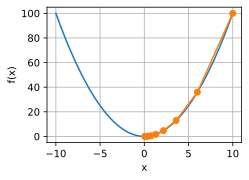

In [7]:
show_trace(results, f)

epoch 10, x: 3.486784


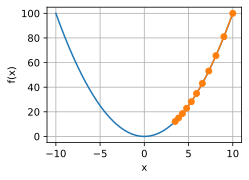

In [8]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


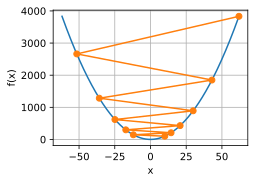

In [9]:
show_trace(gd(1.1, f_grad), f)

In [10]:
c = torch.tensor(0.15 * np.pi)

In [11]:
def f(x):
    return x * torch.cos(c*x)

In [12]:
def f_grad(x):
    return torch.cos(c*x) - c*x*torch.sin(c*x)

epoch 10, x: -1.528166


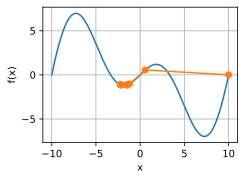

In [14]:
show_trace(gd(2, f_grad), f)

In [15]:
#@save
def train_2d(trainer, steps=20, f_grad=None):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

In [16]:
#@save
def show_trace_2d(f, results):
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1), torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

In [17]:
def f_2d(x1, x2):
    return x1**2 + 2 * x2**2

In [18]:
def f_2d_grad(x1, x2):
    return (2 * x1, 4 * x2)

In [19]:
def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

epoch 20, x1: -0.057646, x2: -0.000073


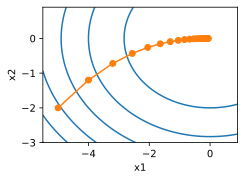

In [20]:
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

In [21]:
c = torch.tensor(0.5)

In [22]:
def f(x):
    return torch.cosh(c*x)

In [23]:
def f_grad(x):
    return c * torch.sinh(c*x)

In [24]:
def f_hess(x):
    return c**2 * torch.cosh(c*x)

In [25]:
def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

epoch 10, x: tensor(0.)


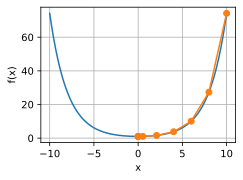

In [26]:
show_trace(newton(), f)

In [27]:
c = torch.tensor(0.15 * np.pi)

In [28]:
def f(x):
    return x * torch.cos(c*x)

In [29]:
def f_grad(x):
    return torch.cos(c*x)-c*x*torch.sin(c*x)

In [30]:
def f_hess(x):
    return -2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c*x)

epoch 10, x: tensor(26.8341)


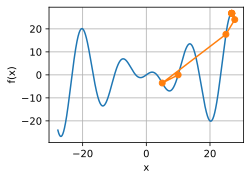

In [31]:
show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


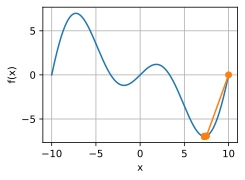

In [32]:
show_trace(newton(0.5), f)